In [6]:
from altaipony.lcio import from_mast, from_path
from altaipony.injrecanalysis import plot_heatmap, tile_up_injection_recovery
from altaipony.altai import find_iterative_median
from altaipony.flarelc import FlareLightCurve

import pytest
import numpy as np

import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline

from funcs.helper import write_flares_to_file, read_custom_aperture_lc, get_window_length_dict
from funcs.custom_detrending import custom_detrending, search_gaps_for_window_length, refine_detrended_flux_err

import copy


from scipy.interpolate import UnivariateSpline

import os

CWD = "/".join(os.getcwd().split("/")[:-2])

In [2]:
clcs = ! ls ../custom_aperture/*fits
clcs = [x.split("/")[-1] for x in clcs]

def get_customlc(TIC, c, clcs):
    for p in clcs:
        if (str(TIC) in p.split("-")[2]) & (c == int(p.split("-")[1][1:])):
            print(p)
            pac = p
    return pac


In [3]:
clcs

['0ca_tess2019082014090-s0001-0000000029780677-0000-s_lc.fits',
 '100ca_tess2019090910225-s0007-0000000318801864-0000-s_lc.fits',
 '101ca_tess2019090910464-s0007-0000000366567664-0000-s_lc.fits',
 '102ca_tess2019090910530-s0007-0000000410898932-0000-s_lc.fits',
 '103ca_tess2019090910582-s0008-0000000000926898-0000-s_lc.fits',
 '103ca_tess2019102415201-s0008-0000000000926898-0000-s_lc.fits',
 '104ca_tess2019090911104-s0008-0000000007975441-0000-s_lc.fits',
 '105ca_tess2019090911241-s0008-0000000011654435-0000-s_lc.fits',
 '106ca_tess2019090911283-s0008-0000000044984200-0000-s_lc.fits',
 '107ca_tess2019100910514-s0008-0000000130414729-0000-s_lc.fits',
 '108ca_tess2019090911533-s0008-0000000142052876-0000-s_lc.fits',
 '108ca_tess2019102509445-s0008-0000000142052876-0000-s_lc.fits',
 '109ca_tess2019090911560-s0008-0000000167894019-0000-s_lc.fits',
 '109ca_tess2019102510083-s0008-0000000167894019-0000-s_lc.fits',
 '10ca_tess2019100710504-s0001-0000000401984769-0000-s_lc.fits',
 '110ca_tess2

In [4]:
paths = ! ls ../injrec/
print(paths)
ids = [p.split("_")[0]for p in paths]
cs = [p.split("_")[1][1:-4]for p in paths]
targs = list(zip(ids,cs))
targs = list(set(targs))
len(targs)

['000000926898_s0007.csv', '000000926898_s0008.csv', '000001539914_s0009.csv', '000002470992_s0010.csv', '000005630425_s0010.csv', '000007150628_s0002.csv', '000007975441_s0008.csv', '000011654435_s0008.csv', '000013713626_s0008.csv', '000029780677_s0001.csv', '000029780677_s0002.csv', '000029780677_s0003.csv', '000029780677_s0004.csv', '000029780677_s0005.csv', '000029780677_s0006.csv', '000029780677_s0007.csv', '000029780677_s0009.csv', '000029780677_s0010.csv', '000029780677_s0011.csv', '000029780677_s0012.csv', '000029780677_s0013.csv', '000029928567_s0003.csv', '000030101427_s0011.csv', '000034014829_s0002.csv', '000035858101_s0004.csv', '000038314290_s0003.csv', '000044892011_s0004.csv', '000044892011_s0005.csv', '000044984200_s0008.csv', '000044984200_s0009.csv', '000044984200_s0010.csv', '000053603145_s0006.csv', '000053603145_s0007.csv', '000055099399_s0009.csv', '000061476051_s0010.csv', '000070555405_s0003.csv', '000072254026_s0012.csv', '000073118477_s0009.csv', '0000770411

190

In [24]:
TIC = "388857263"
c = "0011"

df = pd.read_csv(f"../injrec/000{TIC}_s{c}.csv")

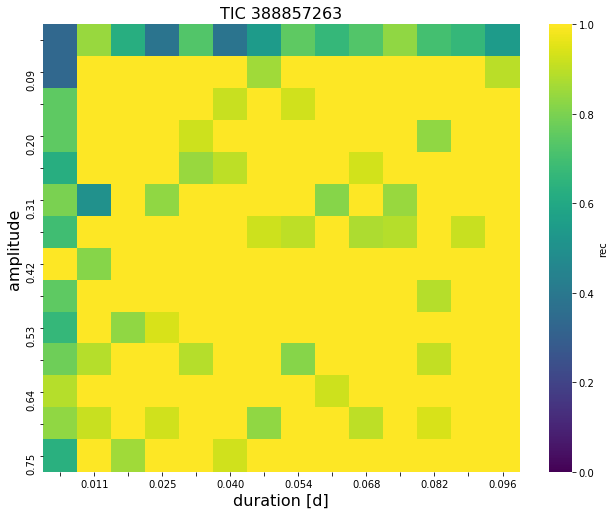

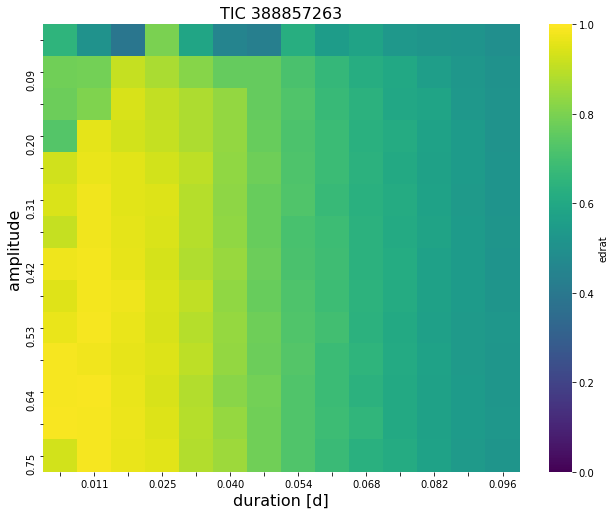

In [25]:
bins = 14
dff, val = tile_up_injection_recovery(df, "recovery_probability",ampl_bins=bins, dur_bins=bins,)
plot_heatmap(dff, val, ID=TIC);
dff, val = tile_up_injection_recovery(df, "ed_ratio",ampl_bins=bins, dur_bins=bins,)
plot_heatmap(dff, val, ID=TIC);

In [26]:
TIC = int(TIC)
c = int(c)

In [27]:
pac = get_customlc(TIC, c, clcs)
print(pac)
pac = "/work1/eilin/TESS_UCDs/TESS_UCD_flares/custom_aperture/" + pac

157ca_tess2019091615122-s0011-0000000388857263-0000-s_lc.fits
157ca_tess2019091615122-s0011-0000000388857263-0000-s_lc.fits


In [28]:
#------ Find flares -------------------------------------------------------------

#d = get_window_length_dict()

flc = read_custom_aperture_lc(pac)


flcd = flc.detrend("custom", func=custom_detrending)

flcd = flcd.find_flares()

#--------------------------------------------------------------------------------

print("\nFinished TIC {} ({})\n------------------------------\n".format(TIC, flc.campaign))

/work1/eilin/Flares_in_Clusters_2/RESULTS_Github/flares-in-clusters-with-k2-ii/flaresinclustersii/lib64/python3.6/site-packages/ipykernel_launcher.py:5: ResourceWarning: unclosed file <_io.FileIO name='/work1/eilin/TESS_UCDs/TESS_UCD_flares/custom_aperture/157ca_tess2019091615122-s0011-0000000388857263-0000-s_lc.fits' mode='rb' closefd=True>
  """
Found 4 candidate(s) in the (0,6586) gap.
Found 8 candidate(s) in the (6586,13204) gap.



Finished TIC 388857263 (11)
------------------------------



In [29]:
flcd.flares

,ampl_rec,cstart,cstop,ed_rec,ed_rec_err,istart,istop,total_n_valid_data_points,tstart,tstop
0,0.014086,269758,269761,3.941825,0.302488,1316,1319,13204.0,1602.123073,1602.127239
1,0.015405,270581,270602,19.444480,0.361482,2126,2147,13204.0,1603.266159,1603.295326
2,0.054384,272512,272523,27.012682,0.137414,4047,4058,13204.0,1605.948170,1605.963448
3,0.003684,273777,273782,1.827360,0.146065,5302,5307,13204.0,1607.705154,1607.712098
4,0.003210,279812,279817,1.417710,0.121054,7745,7750,13204.0,1616.087213,1616.094158
5,0.009172,280603,280606,2.977926,0.151355,8529,8532,13204.0,1617.185836,1617.190003
6,0.036726,281400,281408,12.454872,0.127859,9326,9334,13204.0,1618.292791,1618.303902
7,0.004906,281414,281421,3.594063,0.246854,9340,9347,13204.0,1618.312235,1618.321958
8,0.024479,282444,282469,27.830275,0.369389,10370,10395,13204.0,1619.742803,1619.777525
9,0.014549,284360,284364,5.268164,0.099556,12279,12283,13204.0,1622.403929,1622.409484


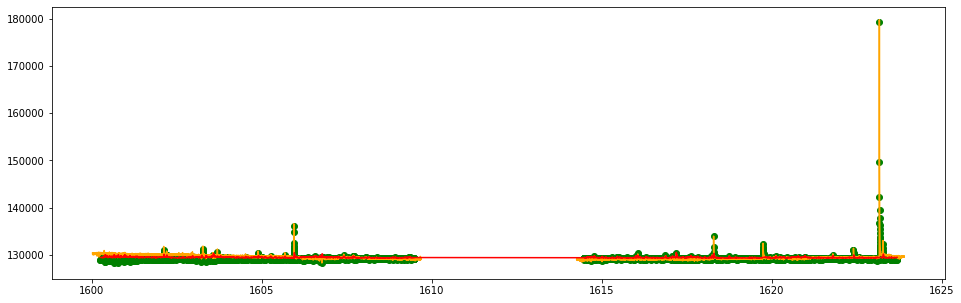

In [30]:
plt.figure(figsize=(16,5))
f = 5

plt.plot(flc.time, flc.flux+f*40, c="orange");
plt.plot(flcd.time, flcd.it_med+3*flcd.detrended_flux_err, c="r");
plt.scatter(flcd.time, flcd.detrended_flux, c="g");
# plt.xlim(1482,1483.3);
# plt.xlim(1487.5,1487.9)

In [89]:
flcd.fake_flares = df
flcd = flcd.characterize_flares(ampl_bins=bins, dur_bins=bins)

In [90]:
flcd.flares.sort_values(by="ampl_rec").head().T

,0,2,3,1
ampl_rec,0.0298798,0.0782101,0.140141,0.507924
cstart,94166,100436,105530,97099
cstop,94173,100439,105535,97113
ed_rec,15.166,16.7771,24.4865,128.766
ed_rec_err,0.644338,0.598524,0.351771,0.572362
istart,2786,8930,12920,5658
istop,2793,8933,12925,5672
total_n_valid_data_points,18018,18018,18018,18018
tstart,1358.25,1366.95,1374.03,1362.32
tstop,1358.26,1366.96,1374.04,1362.34


In [ ]:
with open("/work1/eilin/TESS_UCDs/TESS_UCD_flares/flare_tables/20200217_vetted_flares.csv", "a") as f:
    flcd.flares.to_csv(f, index=False, header=False)